# <b><u> Project Title : Bumps and Potholes detection</u></b>

# <b> Problem Description </b>

### Developing a bumps and potholes detection system using machine learning and deep learning involves training a model to analyze road images, identifying irregularities like bumps and potholes, and providing real-time alerts to enhance road safety and infrastructure maintenance.

### The project aims to leverage advanced computer vision techniques to automate the detection process for efficient and timely road maintenance.



<img src="Picture1.png">

## Importing necessary libraries

In [1]:
import os
import cv2
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense
from tensorflow.keras.optimizers import Adam

C:\Users\HP\anaconda3\lib\site-packages\scipy\__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.24.3
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


##  Step 1: Data Collection

In [2]:
data_dir = 'D:\\datasets\\roadataset'
categories = ["bump", "pothole"]
img_size = 1000  # You can adjust this based on your dataset


In [3]:
import cv2
import os
import numpy as np

# Define the target image size
img_size = (100, 100)  # Adjust as needed
data = []  # List to store resized images
labels = []  # List to store class labels

for category in categories:
    path = os.path.join(data_dir, category)
    class_num = categories.index(category)
    
    for img in os.listdir(path):
        try:
            img_array = cv2.imread(os.path.join(path, img), cv2.IMREAD_GRAYSCALE)
            resized_array = cv2.resize(img_array, img_size)
            data.append(resized_array)
            labels.append(class_num)
        except Exception as e:
            pass

# Convert the data and labels lists to NumPy arrays
data = np.array(data)
labels = np.array(labels)

## Step 2: Define the target image size as a single integer

In [4]:
img_size = 100  # Adjust as needed

X = data  # No need to create a new list
y = labels

# Normalize pixel values
X = X / 255.0

# Reshape the images to match the expected input shape for your model
X = X.reshape(-1, img_size, img_size, 1)



# Split the dataset into training and testing sets

In [5]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

## Step 3: Model Development

In [6]:
model = Sequential()
model.add(Conv2D(32, (3, 3), activation="relu", input_shape=X_train.shape[1:]))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Conv2D(64, (3, 3), activation="relu"))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Flatten())
model.add(Dense(64, activation="relu"))
model.add(Dense(1, activation="sigmoid"))

## Compile the model

In [7]:

model.compile(optimizer=Adam(learning_rate=0.001), loss="binary_crossentropy", metrics=["accuracy"])


## Step 4: Model Training

In [8]:

epochs = 10  # You can adjust the number of epochs
batch_size = 32

history = model.fit(X_train, y_train, epochs=epochs, batch_size=batch_size, validation_split=0.1)

Epoch 1/10
5/5 [==============================] - 1s 144ms/step - loss: 0.9644 - accuracy: 0.4470 - val_loss: 0.6255 - val_accuracy: 0.6000
Epoch 2/10
5/5 [==============================] - 1s 108ms/step - loss: 0.6683 - accuracy: 0.5530 - val_loss: 0.4580 - val_accuracy: 1.0000
Epoch 3/10
5/5 [==============================] - 1s 105ms/step - loss: 0.4108 - accuracy: 0.9545 - val_loss: 0.2546 - val_accuracy: 0.8667
Epoch 4/10
5/5 [==============================] - 1s 117ms/step - loss: 0.2666 - accuracy: 0.8712 - val_loss: 0.2049 - val_accuracy: 0.8667
Epoch 5/10
5/5 [==============================] - 1s 177ms/step - loss: 0.1916 - accuracy: 0.9167 - val_loss: 0.0539 - val_accuracy: 1.0000
Epoch 6/10
5/5 [==============================] - 1s 180ms/step - loss: 0.1090 - accuracy: 0.9470 - val_loss: 0.0370 - val_accuracy: 1.0000
Epoch 7/10
5/5 [==============================] - 1s 159ms/step - loss: 0.1304 - accuracy: 0.9470 - val_loss: 0.0371 - val_accuracy: 1.0000
Epoch 8/10
5/5 [====

## Step 5: Model Evaluation

In [9]:

test_loss, test_acc = model.evaluate(X_test, y_test)
print(f"Test Loss: {test_loss}")
print(f"Test Accuracy: {test_acc}")

2/2 [==============================] - 0s 25ms/step - loss: 0.0338 - accuracy: 1.0000
Test Loss: 0.03376518562436104
Test Accuracy: 1.0


## Step 6: Visualization

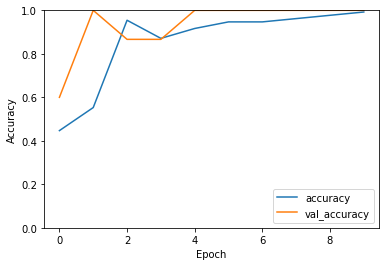

In [23]:
 
plt.plot(history.history["accuracy"], label="accuracy")
plt.plot(history.history["val_accuracy"], label="val_accuracy")
plt.xlabel("Epoch")
plt.ylabel("Accuracy")
plt.ylim([0, 1])
plt.legend(loc="lower right")
plt.show()

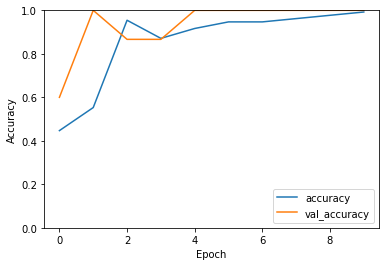

In [11]:

plt.plot(history.history["accuracy"], label="accuracy")
plt.plot(history.history["val_accuracy"], label="val_accuracy")
plt.xlabel("Epoch")
plt.ylabel("Accuracy")
plt.ylim([0, 1])
plt.legend(loc="lower right")
plt.show()

##  Step 7: Inference (Predict Bumps and Potholes)

In [12]:

def predict_image(path):
    img = cv2.imread(path, cv2.IMREAD_GRAYSCALE)
    resized_img = cv2.resize(img, (img_size, img_size))
    resized_img = np.array(resized_img) / 255.0
    resized_img = resized_img.reshape(-1, img_size, img_size, 1)
    prediction = model.predict(resized_img)
    return prediction

## Example usage:

In [13]:

image_path = "C:\\Users\\HP\\OneDrive\\Desktop\\image.jpeg"
prediction = predict_image(image_path)
if prediction >= 0.5:
    print("Predicted: Pothole")
else:
    print("Predicted: Bump")

1/1 [==============================] - 0s 70ms/step
Predicted: Pothole


In [14]:
import cv2
import numpy as np

## Load an image


In [15]:

image_path = 'image.jpeg'
image = cv2.imread(image_path)

## Convert the image to grayscale 

In [16]:

gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

## Apply Gaussian blur to reduce noise 

In [17]:
blurred = cv2.GaussianBlur(gray, (5, 5), 0)


## Use thresholding to detect bumps (adjust the threshold as needed) 

In [24]:

_, thresholded = cv2.threshold(blurred, 100, 255, cv2.THRESH_BINARY)

## Find contours in the thresholded image

In [19]:
contours, _ = cv2.findContours(thresholded, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)


## Draw the contours on the original image 

In [20]:
result = image.copy()
cv2.drawContours(result, contours, -1, (0, 255, 0), 2)

array([[[ 20,  88,  47],
        [  2,  70,  29],
        [ 23,  91,  50],
        ...,
        [  0, 255,   0],
        [  0, 255,   0],
        [  0, 255,   0]],

       [[ 14,  81,  42],
        [  9,  76,  37],
        [ 15,  82,  43],
        ...,
        [  0, 255,   0],
        [  0, 255,   0],
        [  0, 255,   0]],

       [[ 20,  86,  51],
        [ 22,  88,  53],
        [ 26,  92,  57],
        ...,
        [ 73, 146, 106],
        [  0, 255,   0],
        [  0, 255,   0]],

       ...,

       [[  1,   1,   1],
        [  1,   1,   1],
        [  1,   1,   1],
        ...,
        [  1,   1,   1],
        [  1,   1,   1],
        [  1,   1,   1]],

       [[  1,   1,   1],
        [  1,   1,   1],
        [  1,   1,   1],
        ...,
        [  1,   1,   1],
        [  1,   1,   1],
        [  1,   1,   1]],

       [[  1,   1,   1],
        [  1,   1,   1],
        [  1,   1,   1],
        ...,
        [  1,   1,   1],
        [  1,   1,   1],
        [  1,   1,   1]]

# # Display the original image with detected bumps

In [21]:

cv2.imshow('Bump Detection', result)
cv2.waitKey(0)
cv2.destroyAllWindows()